In [1]:
# Import the necessary packages to perform the data analysis

# packages to process and visualize the data
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# packages to improve visual description and analysis
from IPython.core import display as ICD
pd.set_option('display.max_columns', 100)
import os

In [2]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool, LogColorMapper, LogTicker, ColorBar

## Research Question

**To what extent tax heavens and business friendly regulations attract companies from all over the world and contribute to the income inequality in the home countries?**

**What drives entities to go offshore and consequently how does that affect the country?**

In order to answer the above question, the following subquestion have to be answered:

**1)** Which are the jurisdictions in which entities found in Panama papers are registered?

**2)** What countries have the most entities register in the Panama papers?

**3)** What are the burocratic and economic causes pushing entities to go offshore?

**4)** How does the number of entities in a country which are mentioned in the Panama papers reflect with the income inequality within a country?

### Interpretation of the Panama Papers

As shown by the exploratory analysis, the entity document of the Panama Papers is a very interesting: it provides a macroscopic view of how many entities per countries are involved in settling companies offshore. The reasons behind making an offshore company are multiple: setting a company offshore is not a crime, but it is an indication that the business condition in the home country are not always favorable from a privacy point of view, from a bureaucratic point of view and from a tax point of view. In other words it is investigated whether the discrepancy between ease of business that exist between tax haven countries and non tax havens, can be a cause of high income inequality in non tax haven countries. The idea of investigating which of the top 2000 companies in the world are present in the Panama papers and estimate the capital lost was dropped because it is very hard to find the real name of the companies and link the two without doing a stakeholder analysis.

### Practical Objectives

The results that are going to be obtained at the end of the research will be the following:

Which are the jurisdictions in which entities found in Panama papers are registered?

- **Map the tax heavens jurisdiction in terms of the number of entities they have registered **

What countries have the most entities register in the Panama papers?

- **Map countries in the world according to how much they appear in the Panama Papers in terms of entities**

What are the burocratic and economic causes pushing entities to go offshore? How does the number of entities in a country which are mentioned in the Panama papers reflect with the social and income inequality within a country?

- **Investigate the role that the indicators 'Days to open a business', 'Tax rate', 'Time spent dealing with legal requirements', 'Ease of doing business coefficients' have in pushing entities and companies already to establish in countries which offer business friendly regulations**

- **Identify the group of countries whose entities' high presence in the Panama papers is linked to income inequality**

- **Show the evolution of income inequality and entities' presence in the Panama papers over time**

### Description of additional Dataset

In [3]:
folder='../data/'

The followings are the additional datasets used for the investigation taken in the World Bank Dataset:

- `API_SI.POV.GINI_DS2_en_csv_v2_10224868.csv`, is the GINI coefficient per country

- `API_IC.BUS.EASE.XQ_DS2_en_csv_v2_10226725.csv`, is the Ease of Business coefficient per country

- `API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv`, is the GDP per country

- `API_NY.GDP.PCAP.CD_DS2_en_csv_v2_10224851.csv`, is the GDP per capita per country

- `API_IC.REG.DURS_DS2_en_csv_v2_10225592.csv`, is the time to start a business per country

- `API_IC.GOV.DURS.ZS_DS2_en_csv_v2_10230883.csv`, is the time spent by business in government regulation per country

- `API_GC.TAX.YPKG.RV.ZS_DS2_en_csv_v2_10227627.csv`, is the corporate/company tax rate per country (% of commercial profits)

The role of the indicators above in influencing entities and companies to have offshore holdings will be investigated

### Exploratory Analysis

After having examined the number of entities present in the papers according to the country, the role of the indicators highlighted above is investigated. In this notebook two indicators have been partially analysed to provide an example of the type of analysis that will be done.

In [4]:
df_edges_raw = pd.read_csv(folder + 'panama_papers.edges.csv')
df_address_raw = pd.read_csv(folder + 'panama_papers.nodes.address.csv')
df_entity_raw = pd.read_csv(folder + 'panama_papers_modified.nodes.entity.csv', encoding = "ISO-8859-1")
df_intermediary_raw = pd.read_csv(folder + 'panama_papers.nodes.intermediary.csv')
df_officier_raw = pd.read_csv(folder + 'panama_papers.nodes.officer.csv')

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_entity_raw.head()

,node_id,name,jurisdiction,jurisdiction_description,country_codes,countries,incorporation_date,inactivation_date,struck_off_date,closed_date,ibcRUC,status,company_type,service_provider,sourceID,valid_until,note
0,10000001,"TIANSHENG INDUSTRY AND TRADING CO., LTD.",SAM,Samoa,HKG,"Hong Kong SAR, China",23-Mar-06,18-Feb-13,15-Feb-13,NaN,25221,Defaulted,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN
1,10000002,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",SAM,Samoa,HKG,"Hong Kong SAR, China",27-Mar-06,27-Feb-14,15-Feb-14,NaN,25249,Defaulted,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN
2,10000003,"HOTFOCUS CO., LTD.",SAM,Samoa,HKG,"Hong Kong SAR, China",10-Jan-06,15-Feb-12,15-Feb-12,NaN,24138,Defaulted,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN
3,10000004,"SKY-BLUE GIFTS & TOYS CO., LTD.",SAM,Samoa,HKG,"Hong Kong SAR, China",6-Jan-06,16-Feb-09,15-Feb-09,NaN,24012,Defaulted,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN
4,10000005,FORTUNEMAKER INVESTMENTS CORPORATION,SAM,Samoa,HKG,"Hong Kong SAR, China",19-Apr-06,15-May-09,15-Feb-08,NaN,R25638,Changed agent,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN


In [5]:
country_count=pd.DataFrame(df_entity_raw['countries'].value_counts())

Firstly a dataframe with the country and the respective number of entities in the Panama Papers is made. This is used as a base to subsequentially add information regarding the indicators.

In [6]:
country_count=country_count.rename(columns={'countries': 'n_companies_offshore'})
country_count['Country Name']=country_count.index
country_count=country_count.reset_index(drop=True)

In [7]:
country_count.head()

,n_companies_offshore,Country Name
0,37911,"Hong Kong SAR, China"
1,37911,Switzerland
2,21658,Channel Islands
3,15811,Panama
4,10840,Luxembourg


In order to investigate the relationship between income inequality and number of entities in the Panama papers per country, the number of entities per country has to be weighted according to economical size: without doing so, big economies will automatically have a higher number of entities registered in the papers only because they are bigger. Hence GDP and GDP per capita are going to be used as weighting factor for the number of registered entities in papers, n: 

\begin{equation*}
n_{w}=\frac{n}{GDP_{indicator}}
\end{equation*}

In [8]:
df_gdp=pd.read_csv(folder+'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv', skiprows=[0,1,2,3])

In [9]:
df_countries_gdp=pd.DataFrame({'Country Name':df_gdp['Country Name'],'GDP':df_gdp.iloc[:,range(-15,0)].mean(axis=1,numeric_only=True)})
# print(np.sum(df_countries_gdp['GDP'].isnull()))
# df_gdp=df_gdp[df_gdp['GDP'].notnull()]

In [10]:
df_countries_gdp[df_countries_gdp['GDP'].isnull()]

,Country Name,GDP
49,Curacao,NaN
108,Not classified,NaN
145,St. Martin (French part),NaN
170,New Caledonia,NaN
191,"Korea, Dem. People?s Rep.",NaN
197,French Polynesia,NaN


In [11]:
df_gdp_capita=pd.read_csv(folder+'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_10224851.csv', skiprows=[0,1,2,3])

In [12]:
df_countries_gdp_capita=pd.DataFrame({'Country Name':df_gdp_capita['Country Name'],'GDP':df_gdp_capita.iloc[:,range(-15,0)].mean(axis=1,numeric_only=True)})
# print(np.sum(df_countries_gdp['GDP'].isnull()))
# df_gdp=df_gdp[df_gdp['GDP'].notnull()]

In [13]:
df_countries_gdp_capita[df_countries_gdp_capita['GDP'].isnull()]

,Country Name,GDP
49,Curacao,NaN
108,Not classified,NaN
145,St. Martin (French part),NaN
170,New Caledonia,NaN
191,"Korea, Dem. People?s Rep.",NaN
197,French Polynesia,NaN


In [14]:
# count in panama papers and gdp is merged in one dataframe
country_count_gdp=country_count.merge(df_countries_gdp, how='outer',left_on='Country Name', right_on='Country Name')

In [15]:
# count in panama papers and gdp per capita is merged in one dataframe
country_count_gdp=country_count_gdp.merge(df_countries_gdp_capita, how='outer',left_on='Country Name', right_on='Country Name')

In [16]:
country_count_gdp.head()

,n_companies_offshore,Country Name,GDP_x,GDP_y
0,37911.0,"Hong Kong SAR, China",2.420000e+11,34139.405171
1,37911.0,Switzerland,5.693333e+11,72018.654377
2,21658.0,Channel Islands,9.180788e+09,59422.543726
3,15811.0,Panama,3.405630e+10,9062.889846
4,10840.0,Luxembourg,5.192631e+10,100087.833141


In [17]:
country_count_gdp['Country Name'][country_count_gdp['GDP_y'].isna()]

16                        Taiwan
40                          Niue
80                       Curacao
140                 Cook Islands
200               Not classified
213     St. Martin (French part)
225                New Caledonia
233    Korea, Dem. People?s Rep.
238             French Polynesia
Name: Country Name, dtype: object

As highlighted initially, there is a chunck of entities/companies which are registered in Panama papers and which come already from countries with favorable business conditions. Hence it will be important to understand what are these favorable conditions. The year with most data regarding each indicator will be considered assuming that the change in each indicator in the last 10 years is irrelevant. In order to explore the role of each indicator, interactive plots are created to better investigate individually what are the conditions which push entities to go offshore.

An interesting fact can be notice from the distribution of the countries. The majority of the entities present in the papers come from a country with already favourable business condition like Honk Kong, Switzerland and Luxembourg or even from a place considered a fiscal havens (Panama, Jersey). However there is evidence supporting the claim that many entities/companies coming from the above mentioned set of countries don't actually belong to those countries: in fact their GDP and their population are too low to explain such a high presence on a global scale. This fact can be explained with a tendency, amplified by globalization, of big companies of starting their international business already from a convenient country. 

As a consequence it is porbable that entities from all over the world are firstly influenced to go set their businesses already in countries which offer particularly good business conditions such as Switzlerand, Panama, the Channel Islands (Jersey and Guernsey), Luxemburg, the Cayman Islands, Lichteinstein, Singapore and Monaco, Isle of Man and Gibraltar. These countries are known for being small and very developped with high income per capita, but also to often be tax havens. 


Hence, on the one hand it is crucial to understand what are these business conditions (economic and bureaucratic) that make this set of countries the optimum place to do business, but also to easily go offshore and on the other hand what are the economic and bureaucratic causes which influence entities in the other countries to go offshore. 

#### Tax Rate

The first factor which is going to be investigated is Tax Rate; in other words it is going to be investigated whether or not having a high tax rate influence entities to go offshore where they can evade taxes.

In [18]:
df_tax_weight=pd.read_csv(folder+'API_GC.TAX.YPKG.RV.ZS_DS2_en_csv_v2_10227627.csv', skiprows=[0,1,2,3])

In [19]:
years=range(1990, 2018)
years_count=np.array([])

for year in years:
    
    years_count=np.append(years_count,df_tax_weight[str(year)].notnull().sum())
print ('Year with most data is', years[np.argmax(years_count)])

Year with most data is 2010


In [20]:
df_countries_tax=pd.DataFrame({'Country Name':df_tax_weight['Country Name'],'Tax Rate':df_tax_weight.iloc[:,range(-15,0)].mean(axis=1,numeric_only=True)})
print(np.sum(df_countries_tax['Tax Rate'].isnull()))
df_countries_tax=df_countries_tax[df_countries_tax['Tax Rate'].notnull()]

62


In [21]:
df_countries_tax.head()

,Country Name,Tax Rate
1,Afghanistan,3.718429
2,Angola,40.648405
3,Albania,14.046091
5,Arab World,22.879864
7,Argentina,14.509155


A dataset with tax rate and number of companies registered in the panama papers is made.

In [22]:
country_count_tax_rate=country_count_gdp.merge(df_countries_tax, how='outer',left_on='Country Name', right_on='Country Name')

In [113]:
country_count_tax_rate[country_count_tax_rate['GDP_y']>30000]

,n_companies_offshore,Country Name,GDP_x,GDP_y,Tax Rate
0,37911.0,"Hong Kong SAR, China",2.420000e+11,34139.405171,NaN
1,37911.0,Switzerland,5.693333e+11,72018.654377,20.860170
2,21658.0,Channel Islands,9.180788e+09,59422.543726,0.000000
4,10840.0,Luxembourg,5.192631e+10,100087.833141,28.729217
5,9619.0,United Kingdom,2.642000e+12,42089.915141,35.517248
6,7269.0,United Arab Emirates,2.939333e+11,39757.577518,NaN
9,4892.0,Isle of Man,5.216144e+09,65308.380697,0.000000
11,4081.0,Singapore,2.271334e+11,44514.552559,32.456850
14,3168.0,Monaco,5.301932e+09,148406.483360,0.000000
15,3066.0,United States,1.542000e+13,49764.761713,52.429123


Substitute the tax rate where NaN is present by integrating the data with additional sources. In particular the tax rate in the channel island Jersey and Guersey, in the Isle of Man, Monaco, Lichtenstein, Gibraltar, Bermuda and Cayman Islands have been looked up in their respective government websites.

- Jersey and Guernesey as part of the channel islands have a corporate tax rate of 0% with exeption for some kind of businesses with maximum values of 20% [Jersey](https://www.gov.je/LifeEvents/MovingToJersey/pages/tax.aspx), [Guernsey](https://www.gov.gg/article/120167/Tax-for-businesses-companies-and-employers)

- Isle of Man has a corporate tax rate of 0% with exeption for some kind of businesses with maximum values of 20% [Isle of Man](https://www.gov.im/categories/tax-vat-and-your-money/income-tax-and-national-insurance/business-and-corporations/corporate-tax-rates/)

- Monaco has a corporate tax rate of 0% [Monaco](https://www.investopedia.com/ask/answers/060316/why-monaco-considered-tax-haven.asp)

- Lichtenstein has a corporate tax rate of 12.5% [Lichtenstein](http://taxsummaries.pwc.com/ID/Liechtenstein-Corporate-Taxes-on-corporate-income)

- Gibraltar has a corporate tax rate of 10% [Gibraltar](https://www.ey.com/Publication/vwLUAssets/ey-gibraltar-tax-facts-2017-18/$FILE/ey-gibraltar-tax-facts-2017-18.pdf)

- Cayman Islands has a corporate tax rate of 0% [Cayman Islands](https://www.investopedia.com/ask/answers/100215/why-cayman-islands-considered-tax-haven.asp)

- Cayman Islands has a corporate tax rate of 16.5% [Hong Kong](https://tradingeconomics.com/hong-kong/corporate-tax-rate)

- No consistent information was found about Bermuda Islands


In [114]:
country_count_tax_rate['Tax Rate'][country_count_tax_rate['Country Name']=='Channel Islands']=0
country_count_tax_rate['Tax Rate'][country_count_tax_rate['Country Name']=='Isle of Man']=0
country_count_tax_rate['Tax Rate'][country_count_tax_rate['Country Name']=='Monaco']=0
country_count_tax_rate['Tax Rate'][country_count_tax_rate['Country Name']=='Liechtenstein']=12.5
country_count_tax_rate['Tax Rate'][country_count_tax_rate['Country Name']=='Gibraltar']=10
country_count_tax_rate['Tax Rate'][country_count_tax_rate['Country Name']=='Cayman Islands']=0
country_count_tax_rate['Tax Rate'][country_count_tax_rate['Country Name']=='Hong Kong SAR, China']=16.5

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/U

Firstly the graph of tax rate and presence in Panama Paper of small developped countries with high income per capita is plotted. In fact, by looking at these relationship it will be possible to understand if all small developped countries with high income per capita present favourable characteristics to go offshore. 

All the countries with GDP per capita `GDP_y`>30000 and a total GDP `GDP_x`< 200 billions USD have been considered.

The GDP has been used as a weight for the count of entities offshore because the discrepancy between the size of the economies is really high.

By observing the plot below some important considerations can be drawn; two set of countries can be identified: tax havens countries and small developped countries. Firstly the tax havens countries can be identified very easily since they have a high presence in the papers and at the same time they have really low tax rates. The rest of the countries are small developped usually European countries. The trend of non tax havens countries shows that high tax rate is not a factor pushing entities to go offshore: in fact there is a negative exponential relationship between presence in panama papers and tax rates. However this relationship could imply the presence of an hidden covariate: high tax rate might be sinonim of tighter control and regulations on entities going offshore, meaning that countries with tighter controls will naturally have a lower number of offshore companies.

In addition the graph also seems to suggest that the resons behind the presence of many companies offshore in tax havens is not only the low taxation levels: in fact corporate tax rate of tax havens countries is often comparable to that one of other small european countries. As a matter of fact tax havens countries offer entities favorable conditions to easily set compabies offshore compared to other small countries.

In [115]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool, LogColorMapper, LogTicker, ColorBar
from bokeh.layouts import row

selection=country_count_tax_rate['GDP_y'].apply(lambda x: x>30000) & country_count_tax_rate['GDP_x'].apply(lambda x: x<200*10e9)

x = country_count_tax_rate['Tax Rate'][selection]
y = np.log10(country_count_tax_rate['n_companies_offshore'][selection]/country_count_tax_rate['GDP_x'][selection])
country_names=country_count_tax_rate['Country Name'][selection]
c = country_count_tax_rate['GDP_x'][selection]
c[c.isna()]=0

# establish the color mapper schema
color_mapper = LogColorMapper(palette="Colorblind3", low=min(c),\
                              high=max(c))

# establish the sources of data to make the interactive graph
source=ColumnDataSource(data=dict(
    x=list(x),
    y=list(y),
    country=list(country_names),
    c=list(c),
))

    
# set the regression line
df=pd.DataFrame({'Tax Rate':x,'n_companies_offshore':y})
df=df.dropna(inplace=False)
df=df[df['n_companies_offshore'].apply(lambda x: x<-8)]

a=np.array(df['Tax Rate'])
a=np.stack((a,np.ones(a.shape[0])), axis=1)
b=np.array(df['n_companies_offshore'])

m = np.linalg.lstsq(a,b, rcond=None)[0]

p = figure(title="Number of entities offshore vs tax rate (Small developped countries)")

scatter=p.scatter(x='x', y='y', radius=1, source=source, color={'field': 'c', 'transform': color_mapper}, alpha=0.5)
hover= HoverTool(tooltips = [("Country", "@country"),("(Tax Rate, Log(number of entities offshore))", "($x, $y)")],renderers=[scatter])
p.add_tools(hover)


line=p.line(df['Tax Rate'], m[0]*df['Tax Rate']+m[1], line_width=4, color='navy', alpha=0.1)
hover0=HoverTool(tooltips = [("Set of Country",'Not tax havens countries')], renderers=[line])
p.add_tools(hover0)
circle=p.circle(16, -6.8, size=330, color="navy", alpha=0.1)
hover1=HoverTool(tooltips = [("Set of Country",'Tax havens')], renderers=[circle])
p.add_tools(hover1)


# set the style of the title
p.title.text_color = "grey"
p.title.text_font = "helvetica"
p.title.text_font_style = "normal"
p.title.text_font_size = '11pt'

# set the label options
p.xaxis.axis_label='Tax Rate (%)'
p.yaxis.axis_label='Number of Entities Offshore (log scale)'

# add the color bar
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(20,0))

# set the color bar title
color_bar_height = 511
color_bar_width = 35

color_bar_plot = figure(title="Real GDP Legend Bar (USD)", title_location="right", 
                        height=color_bar_height, width=color_bar_width, 
                        toolbar_location=None, min_border=None, 
                        outline_line_color=None)

p.add_layout(color_bar, 'right')

# remove the interactive toolbar
p.toolbar.logo = None
p.toolbar_location = None

layout = row(p, color_bar_plot)
output_file("taxratesmalldeveloppedcountries.html", title="taxratesmalldeveloppedcountries")
show(layout)




Secondly the graph of tax rate and presence in Panama Paper of developping countries is plotted. BRICs countries have been considered, as well as all other countries which had a GDP greater than 40 billions USD a year. Also in this case the GDP has been used as a weight for the count of entities offshore because the discrepancy between the size of the economies is really high.

By observing this graphs a negative exponential relationship can be again observed further showing that for this category of countries tax rate is not a factor pushing entities to go offshore: actually the higher the tax rate the lower the number of companies offshore. This is a further proof to the hypothesis that higher tax rates are correlates with higher regulations as shown in the graph for small developped countries.

In [110]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool, LogColorMapper, LogTicker, ColorBar

selection=country_count_tax_rate['GDP_y'].apply(lambda x: x<15000) & country_count_tax_rate['GDP_x'].apply(lambda x: x>40*10e9)

x = country_count_tax_rate['Tax Rate'][selection]
y = np.log10(country_count_tax_rate['n_companies_offshore'][selection]/country_count_tax_rate['GDP_x'][selection])
country_names=country_count_tax_rate['Country Name'][selection]
c = country_count_tax_rate['GDP_x'][selection]
c[c.isna()]=0

# set the regression line
df=pd.DataFrame({'Tax Rate':x,'n_companies_offshore':y})
df=df.dropna(inplace=False)
a=np.array(df['Tax Rate'])
a=np.stack((a,np.ones(a.shape[0])), axis=1)
b=np.array(df['n_companies_offshore'])

m = np.linalg.lstsq(a,b, rcond=None)[0]


# establish the color mapper schema
color_mapper = LogColorMapper(palette="Colorblind4", low=min(c),\
                              high=max(c))

# establish the sources of data to make the interactive graph
source=ColumnDataSource(data=dict(
    x=list(x),
    y=list(y),
    country=list(country_names),
    c=list(c),
))

p = figure(title="Number of entities offshore vs tax rate (Major developping countries)")
scatter=p.scatter(x='x', y='y', radius=1, source=source, color={'field': 'c', 'transform': color_mapper}, alpha=0.5)
hover= HoverTool(tooltips = [("Country", "@country"),("(Tax Rate, Log(number of entities offshore))", "($x, $y)")],renderers=[scatter])
p.add_tools(hover)

line=p.line(df['Tax Rate'], m[0]*df['Tax Rate']+m[1], line_width=4, color='navy', alpha=0.1)
hover0=HoverTool(tooltips = [("Set of Country",'Developping countries')], renderers=[line])
p.add_tools(hover0)

# set the style of the title
p.title.text_color = "grey"
p.title.text_font = "helvetica"
p.title.text_font_style = "normal"
p.title.text_font_size = '11pt'

# set the label options
p.xaxis.axis_label='Tax Rate (%)'
p.yaxis.axis_label='Number of Entities Offshore (log scale)'


# set the color bar tab
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

# set the color bar title
color_bar_height = 511
color_bar_width = 35

color_bar_plot = figure(title="Real GDP Legend Bar (USD)", title_location="right", 
                        height=color_bar_height, width=color_bar_width, 
                        toolbar_location=None, min_border=None, 
                        outline_line_color=None)

# add the color bar
p.add_layout(color_bar, 'right')

# remove the interactive toolbar
p.toolbar.logo = None
p.toolbar_location = None

layout = row(p, color_bar_plot)
output_file("developpingcountries.html", title="developpingcountries")
show(layout)




Graph of the biggest economies. The relationship between the 7 biggest economies and tax rate has been investigated. The economies almost correspond to the G7 countries, but China has taken the place of Canada. Even though these are the biggest economies in the world, the difference in size between them influence the probability of creating business and hence having companies offshore. As a consequence also in this case the GDP was used to weight the number of offshore entities present in the panama papers. 

All the countries with a total GDP `GDP_x`> 200 billions USD have been considered.

The figure below shows a completely different picture, compared to the previous ones: taking out Japan, it seems to be a positive exponential relationship between tax rate and number of offshore entities for the economically strongest countries suggesting that in these countries, entities are escaping corporate taxation levels by putting their companies offshore. Japan represents an exception among the 7 biggest economies: even though it has a very high tax rate, the presence of Japanese entities in the documents is really low. This could be due to cultural reasons or might be due to the fact that Japanese entities use different means to go offshore and they are not very represented in the Panama Papers themselves.

In [111]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool


selection=country_count_tax_rate['GDP_x'].apply(lambda x: x>200*10e9)
x = country_count_tax_rate['Tax Rate'][selection]
y = np.log10(country_count_tax_rate['n_companies_offshore'][selection]/country_count_tax_rate['GDP_x'][selection])
country_names=country_count_tax_rate['Country Name'][selection]

# establish the sources of data to make the interactive graph
source=ColumnDataSource(data=dict(
    x=list(x),
    y=list(y),
    country=list(country_names),
))

# set the regression line
df=pd.DataFrame({'Tax Rate':x,'n_companies_offshore':y, 'country_name':country_names})
df=df[df['country_name'].apply(lambda x: str(x)!='Japan')]
df=df.dropna(inplace=False)
a=np.array(df['Tax Rate'])
a=np.stack((a,np.ones(a.shape[0])), axis=1)
b=np.array(df['n_companies_offshore'])

m = np.linalg.lstsq(a,b, rcond=None)[0]

p = figure(title="Number of entities offshore vs tax rate (G7 countries)")
scatter=p.scatter(x='x', y='y', radius=1, source=source, fill_alpha=0.6)
hover= HoverTool(tooltips = [("Country", "@country"),("(Tax Rate, Log(number of entities offshore))", "($x, $y)")],renderers=[scatter])
p.add_tools(hover)

line=p.line(df['Tax Rate'], m[0]*df['Tax Rate']+m[1], line_width=4, color='navy', alpha=0.1)
hover0=HoverTool(tooltips = [("Set of Country",'Major biggest economies')], renderers=[line])
p.add_tools(hover0)

# set the style of the title
p.title.text_color = "grey"
p.title.text_font = "helvetica"
p.title.text_font_style = "normal"
p.title.text_font_size = '11pt'

# set the label options
p.xaxis.axis_label='Tax Rate (%)'
p.yaxis.axis_label='Number of Entities Offshore (log scale)'

# remove the interactive toolbar
p.toolbar.logo = None
p.toolbar_location = None

output_file("taxrateg7.html", title="taxrateg7")

show(p)

Eventually after having analyzed the above set of countries, the global picture for developped countries has been drawn. Observing the figure, on a global scale it can be seen that there is no significant correlation between corporate tax rate and presence of offshore entities in the Panama Papers. However it is clear the a positive relationship between tax rate and number of offshore entities holds true for the major economies which are the biggest data points.

In [112]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool, LogColorMapper, LogTicker, ColorBar

selection=country_count_tax_rate['GDP_y']>15000
x=country_count_tax_rate['Tax Rate'][selection]
y=np.log10(country_count_tax_rate['n_companies_offshore'][selection])
radii=country_count_tax_rate['GDP_x'][selection]*10e-13
country_names=country_count_tax_rate['Country Name'][selection]
# for colors
c = country_count_tax_rate['GDP_y'][selection]
c[c.isna()]=0


color_mapper = LogColorMapper(palette="Colorblind4", low=min(c),\
                              high=max(c))

source=ColumnDataSource(data=dict(
    x=list(x),
    y=list(y),
    country=list(country_names),
    radii=list(radii),
    c=list(c),
))


# set the regression line
df=pd.DataFrame({'Tax Rate':x,'n_companies_offshore':y})
df=df.dropna(inplace=False)

a=np.array(df['Tax Rate'])
a=np.stack((a,np.ones(a.shape[0])), axis=1)
b=np.array(df['n_companies_offshore'])

m = np.linalg.lstsq(a,b, rcond=None)[0]

p = figure(title="Number of entities offshore vs tax rate (all developped countries)")
scatter=p.scatter(x='x', y='y', radius='radii', source=source, color={'field': 'c', 'transform': color_mapper}, alpha=0.5)
hover= HoverTool(tooltips = [("Country", "@country"),("(Tax Rate, Log(number of entities offshore))", "($x, $y)")],renderers=[scatter])
p.add_tools(hover)

line=p.line(df['Tax Rate'], m[0]*df['Tax Rate']+m[1], line_width=4, color='navy', alpha=0.1)
hover0=HoverTool(tooltips = [("Set of Country",'Trend in all developped countries')], renderers=[line])
p.add_tools(hover0)

# set the color bar tab
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

# set the color bar title
color_bar_height = 511
color_bar_width = 35

color_bar_plot = figure(title="Real GDP per capita Legend Bar (USD)", title_location="right", 
                        height=color_bar_height, width=color_bar_width, 
                        toolbar_location=None, min_border=None, 
                        outline_line_color=None)


# set the style of the title
p.title.text_color = "grey"
p.title.text_font = "helvetica"
p.title.text_font_style = "normal"
p.title.text_font_size = '11pt'

# set the label options
p.xaxis.axis_label='Tax Rate (%)'
p.yaxis.axis_label='Number of Entities Offshore (log scale)'

# add the color bar
p.add_layout(color_bar, 'right')
                        
# remove the interactive toolbar
p.toolbar.logo = None
p.toolbar_location = None

layout = row(p, color_bar_plot)
output_file("taxrate_developped.html", title="taxrate_developped")
show(layout)


### Days to open a  business

Chances of having better business already push companies to have holdings in tax havens or semi tax haven countries such as Singapore, Switzerland or Hong Kong. How much weight does this coefficient have?

In [54]:
df_ease_business=pd.read_csv(folder+'API_IC.REG.DURS_DS2_en_csv_v2_10225592.csv', skiprows=[0,1,2,3])

In [55]:
years=range(1990, 2018)
years_count=np.array([])

for year in years:
    
    years_count=np.append(years_count,df_ease_business[str(year)].notnull().sum())
print ('Year with most data is', years[np.argmax(years_count)])

Year with most data is 2015


In [56]:
#df_countries_ease_business=pd.DataFrame({'Country Name':df_ease_business['Country Name'][df_ease_business['2015'].notnull()],'days_open_business':df_ease_business['2015'][df_ease_business['2013'].notnull()]})
df_countries_ease_business=pd.DataFrame({'Country Name':df_ease_business['Country Name'],'days_open_business':df_ease_business.iloc[:,range(-15,0)].mean(axis=1,numeric_only=True)})
df_countries_ease_business=df_countries_ease_business[df_countries_ease_business['days_open_business'].notnull()]

In [57]:
df_countries_ease_business.head()

,Country Name,days_open_business
1,Afghanistan,8.071429
2,Angola,64.714286
3,Albania,15.357143
5,Arab World,26.151124
6,United Arab Emirates,13.350000


In [58]:
country_count_ease_business=country_count_gdp.merge(df_countries_ease_business, how='inner',left_on='Country Name', right_on='Country Name')

The distribution of the ease of business coefficients is found

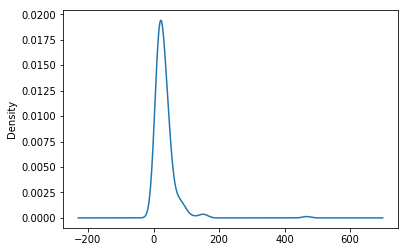

In [59]:
country_count_ease_business['days_open_business'].plot(kind='kde')

In [60]:
country_count_ease_business.head()

,n_companies_offshore,Country Name,GDP_x,GDP_y,days_open_business
0,37911.0,"Hong Kong SAR, China",2.420000e+11,34139.405171,5.821429
1,37911.0,Switzerland,5.693333e+11,72018.654377,15.714286
2,15811.0,Panama,3.405630e+10,9062.889846,10.714286
3,10840.0,Luxembourg,5.192631e+10,100087.833141,19.166667
4,9619.0,United Kingdom,2.642000e+12,42089.915141,9.464286


A dataset with ease of business conditions and number of companies registered in the panama papers is made.

Graph of days to open business and presence in Panama Paper of small developped countries with high income per capita 

In [65]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool

# for colors
c = country_count_ease_business['GDP_x'][country_count_ease_business['GDP_y'].apply(lambda x: x>30000) & country_count_ease_business['GDP_x'].apply(lambda x: x<200*10e9)]
c[c.isna()]=0

x = country_count_ease_business['days_open_business'][country_count_ease_business['GDP_y'].apply(lambda x: x>30000) & country_count_ease_business['GDP_x'].apply(lambda x: x<200*10e9)]
y = np.log10(country_count_ease_business['n_companies_offshore'][country_count_ease_business['GDP_y'].apply(lambda x: x>30000) & country_count_ease_business['GDP_x'].apply(lambda x: x<200*10e9)])
#radii = possibility to add radii as a measure of the economy size

color_mapper = LogColorMapper(palette="Colorblind4", low=min(c),\
                              high=max(c))

source=ColumnDataSource(data=dict(
    x=list(country_count_ease_business['days_open_business'][country_count_ease_business['GDP_y'].apply(lambda x: x>30000) & country_count_ease_business['GDP_x'].apply(lambda x: x<200*10e9)]),
    y=list(np.log10(country_count_ease_business['n_companies_offshore'][country_count_ease_business['GDP_y'].apply(lambda x: x>30000) & country_count_ease_business['GDP_x'].apply(lambda x: x<200*10e9)])),
    country=list(country_count_ease_business['Country Name'][country_count_ease_business['GDP_y'].apply(lambda x: x>30000) & country_count_ease_business['GDP_x'].apply(lambda x: x<200*10e9)]),
    c=list(c),
))

# colors = [
#     "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
# ]

hover= HoverTool(tooltips = [("Country", "@country"),("(Days open business, Logfrequency)", "($x, $y)")])

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=[hover], title="Number of entities offshore vs days to open a business")

p.title.text_color = "blue"
p.title.text_font = "helvetica"
p.title.text_font_style = "italic"

p.xaxis.axis_label='Days to open a business'
p.yaxis.axis_label='log_10(n_entities offshore)'

p.scatter(x='x', y='y', radius=1, source=source, color={'field': 'c', 'transform': color_mapper}, fill_alpha=0.6)

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

# add the color bar
p.add_layout(color_bar, 'right')

output_file("daysopnebusinesssmalldeveloppedcountries.html", title="daysopnebusinesssmalldeveloppedcountries")

show(p)

Graph of the biggest economies

In [66]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool

x = country_count_ease_business['days_open_business'][country_count_ease_business['GDP_x'].apply(lambda x: x>200*10e9)]
y = np.log10(country_count_ease_business['n_companies_offshore'][country_count_ease_business['GDP_x'].apply(lambda x: x>200*10e9)])
#radii = possibility to add radii as a measure of the economy size

source=ColumnDataSource(data=dict(
    x=list(country_count_ease_business['days_open_business'][country_count_ease_business['GDP_x'].apply(lambda x: x>200*10e9)]),
    y=list(np.log10(country_count_ease_business['n_companies_offshore'][country_count_ease_business['GDP_x'].apply(lambda x: x>200*10e9)])),
    country=list(country_count_ease_business['Country Name'][country_count_ease_business['GDP_x'].apply(lambda x: x>200*10e9)]),
))

# colors = [
#     "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
# ]

hover= HoverTool(tooltips = [("Country", "@country"),("(Days to open business, Logfrequency)", "($x, $y)")])

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=[hover], title="Number of entities offshore vs days to open business")

p.title.text_color = "blue"
p.title.text_font = "helvetica"
p.title.text_font_style = "italic"

p.xaxis.axis_label='Days open a business'
p.yaxis.axis_label='log_10(n_entities offshore)'

p.scatter(x='x', y='y', radius=1, source=source, fill_alpha=0.6)

output_file("daysopenbusinessg8.html", title="daysopenbusinessg8")

show(p)

Graph of days to open business of all developped countries with legend of GDP per capita and GDP

In [239]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool, LogColorMapper, LogTicker, ColorBar

# for colors
c = country_count_ease_business['GDP_y'][country_count_ease_business['GDP_y']>15000]
c[c.isna()]=0



# colors = [
#     "#%02x%02x%02x" % (int(r), 25, 50) for r in x*10e-7
# ]

color_mapper = LogColorMapper(palette="Colorblind8", low=min(c),\
                              high=max(c))

source=ColumnDataSource(data=dict(
    x=list(country_count_ease_business['days_open_business'][country_count_ease_business['GDP_y']>15000]),
    y=list(np.log10(country_count_ease_business['n_companies_offshore'][country_count_ease_business['GDP_y']>15000])),
    country=list(country_count_ease_business['Country Name'][country_count_ease_business['GDP_y']>15000]),
    radii=list(country_count_ease_business['GDP_x'][country_count_ease_business['GDP_y']>15000]*10e-13),
    c=list(c),
))



hover= HoverTool(tooltips = [("Country", "@country"),("(Tax Rate, Logfrequency)", "($x, $y)")])

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=[hover], title="Number of entities offshore vs days to open a business")

p.title.text_color = "blue"
p.title.text_font = "helvetica"
p.title.text_font_style = "italic"

p.xaxis.axis_label='Days open a business'
p.yaxis.axis_label='log_10(n_entities offshore)'

p.scatter(x='x', y='y', radius='radii', source=source, color={'field': 'c', 'transform': color_mapper}, alpha=0.5)

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

# add the color bar
p.add_layout(color_bar, 'right')

output_file("daysopenbusinessdevelopped.html", title="daysopenbusinessdevelopped")

show(p)

### Ease of Business Coefficient

In [67]:
df_ease_business_coefficient=pd.read_csv(folder+'API_IC.BUS.EASE.XQ_DS2_en_csv_v2_10226725.csv', skiprows=[0,1,2,3])

In [70]:
years=range(1990, 2018)
years_count=np.array([])

for year in years:
    
    years_count=np.append(years_count,df_ease_business_coefficient[str(year)].notnull().sum())
print ('Year with most data is', years[np.argmax(years_count)])

Year with most data is 2017


In [71]:
df_ease_business_coefficient=pd.DataFrame({'Country Name':df_ease_business_coefficient['Country Name'],'business_coefficient':df_ease_business_coefficient.iloc[:,range(-15,0)].mean(axis=1,numeric_only=True)})
df_ease_business_coefficient=df_ease_business_coefficient[df_ease_business_coefficient['business_coefficient'].notnull()]

In [72]:
df_ease_business_coefficient.head()

,Country Name,business_coefficient
1,Afghanistan,183.0
2,Angola,175.0
3,Albania,65.0
6,United Arab Emirates,21.0
7,Argentina,117.0


In [73]:
country_count_ease_business_coefficient=country_count_gdp.merge(df_ease_business_coefficient, how='inner',left_on='Country Name', right_on='Country Name')

The distribution of the ease of business coefficients is found

In [75]:
country_count_ease_business_coefficient.head()

,n_companies_offshore,Country Name,GDP_x,GDP_y,business_coefficient
0,37911.0,"Hong Kong SAR, China",2.420000e+11,34139.405171,5.0
1,37911.0,Switzerland,5.693333e+11,72018.654377,33.0
2,15811.0,Panama,3.405630e+10,9062.889846,79.0
3,10840.0,Luxembourg,5.192631e+10,100087.833141,63.0
4,9619.0,United Kingdom,2.642000e+12,42089.915141,7.0


A dataset with ease of business conditions and number of companies registered in the panama papers is made.

In [77]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool

x = country_count_ease_business_coefficient['business_coefficient'][country_count_ease_business_coefficient['GDP_y']>50000]
y = np.log10(country_count_ease_business_coefficient['n_companies_offshore'][country_count_ease_business_coefficient['GDP_y']>50000])
#radii = possibility to add radii as a measure of the economy size

source=ColumnDataSource(data=dict(
    x=list(country_count_ease_business_coefficient['business_coefficient'][country_count_ease_business_coefficient['GDP_y']>50000]),
    y=list(np.log10(country_count_ease_business_coefficient['n_companies_offshore'][country_count_ease_business_coefficient['GDP_y']>50000])),
    country=list(country_count_ease_business_coefficient['Country Name'][country_count_ease_business_coefficient['GDP_y']>50000]),
))

# colors = [
#     "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
# ]

hover= HoverTool(tooltips = [("Country", "@country"),("(days to open business, Logfrequency)", "($x, $y)")])

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"


p = figure(tools=[hover],title="Number of entities offshore vs business coefficient")

p.scatter(x='x', y='y', radius=0.8, source=source, fill_alpha=0.6)

p.title.text_color = "blue"
p.title.text_font = "helvetica"
p.title.text_font_style = "italic"

p.xaxis.axis_label='business coefficient'
p.yaxis.axis_label='log_10(n_entities offshore)'

output_file("ease_business.html", title="ease_business")

show(p)

### Time spent in regulations

In [84]:
df_time_regulation=pd.read_csv(folder+'API_IC.GOV.DURS.ZS_DS2_en_csv_v2_10230883.csv', skiprows=[0,1,2,3])

In [85]:
df_time_regulation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Time spent dealing with the requirements of go...,IC.GOV.DURS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Time spent dealing with the requirements of go...,IC.GOV.DURS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,9.8,NaN,NaN,NaN,NaN
2,Angola,AGO,Time spent dealing with the requirements of go...,IC.GOV.DURS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN,NaN,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Time spent dealing with the requirements of go...,IC.GOV.DURS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9,NaN,18.7,NaN,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Time spent dealing with the requirements of go...,IC.GOV.DURS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
years=range(1990, 2018)
years_count=np.array([])

for year in years:
    
    years_count=np.append(years_count,df_time_regulation[str(year)].notnull().sum())
print ('Year with most data is', years[np.argmax(years_count)])

Year with most data is 2009


In [87]:
df_time_regulation=pd.DataFrame({'Country Name':df_time_regulation['Country Name'],'time_regulation':df_time_regulation.iloc[:,range(-15,0)].mean(axis=1,numeric_only=True)})
df_time_regulation=df_time_regulation[df_time_regulation['time_regulation'].notnull()]

In [88]:
df_time_regulation.head()

,Country Name,time_regulation
1,Afghanistan,8.300000
2,Angola,9.650000
3,Albania,11.766667
5,Arab World,9.718182
7,Argentina,18.466667


In [89]:
country_count_ease_regulation_time=country_count_gdp.merge(df_time_regulation, how='outer',left_on='Country Name', right_on='Country Name')

The distribution of the ease of business coefficients is found

In [96]:
country_count_ease_regulation_time[country_count_ease_regulation_time['time_regulation'].isna()]

,n_companies_offshore,Country Name,GDP_x,GDP_y,time_regulation
0,37911.0,"Hong Kong SAR, China",2.420000e+11,34139.405171,NaN
1,37911.0,Switzerland,5.693333e+11,72018.654377,NaN
2,21658.0,Channel Islands,9.180788e+09,59422.543726,NaN
4,10840.0,Luxembourg,5.192631e+10,100087.833141,NaN
5,9619.0,United Kingdom,2.642000e+12,42089.915141,NaN
6,7269.0,United Arab Emirates,2.939333e+11,39757.577518,NaN
9,4892.0,Isle of Man,5.216144e+09,65308.380697,NaN
11,4081.0,Singapore,2.271334e+11,44514.552559,NaN
12,3613.0,Cyprus,2.239481e+10,27664.743573,NaN
14,3168.0,Monaco,5.301932e+09,148406.483360,NaN


A dataset with ease of business conditions and number of companies registered in the panama papers is made.

In [ ]:
sns.jointplot(country_count_ease_regulation_time['time_regulation'],np.log10(country_count_ease_regulation_time['n_companies_offshore']))

In [ ]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool

x = country_count_ease_regulation_time['time_regulation']
y = np.log10(country_count_ease_regulation_time['n_companies_offshore'])
#radii = possibility to add radii as a measure of the economy size

source=ColumnDataSource(data=dict(
    x=list(country_count_ease_regulation_time['time_regulation']),
    y=list(np.log10(country_count_ease_regulation_time['n_companies_offshore'])),
    country=list(country_count_ease_regulation_time['Country Name']),
))

colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

hover= HoverTool(tooltips = [("Country", "@country"),("(days to open business, Logfrequency)", "($x, $y)")])

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"


p = figure(tools=[hover],title="Number of entities offshore vs time spent with regulations")

p.scatter(x='x', y='y', radius=0.5, source=source, fill_alpha=0.6)

p.title.text_color = "blue"
p.title.text_font = "helvetica"
p.title.text_font_style = "italic"

p.xaxis.axis_label='time spent in regulations'
p.yaxis.axis_label='log_10(n_entities offshore)'

output_file("time_regulation.html", title="time_regulation")

show(p)

#### Example of Gini Coefficient Analysis

Finally an example of how the above mentioned coefficients will be used as weighting factors to investigate income inequality is given for tax rate.

In [ ]:
df_gini=pd.read_csv(path+'API_SI.POV.GINI_DS2_en_csv_v2_10224868.csv', skiprows=[0,1,2,3])

In [ ]:
df_gini.head()

In [ ]:
years=range(1990, 2018)
years_count=np.array([])

for year in years:
    
    years_count=np.append(years_count,df_gini[str(year)].notnull().sum())
print ('Year with most data is', years[np.argmax(years_count)])

In [ ]:
df_countries_gini=pd.DataFrame({'Country Name':df_gini['Country Name'][df_gini['2010'].notnull()],'Gini Coefficient':df_gini['2010'][df_gini['2010'].notnull()]})

In [ ]:
df_countries_gini.head()

In [ ]:
country_count_gini=country_count_gdp.merge(df_countries_gini, how='inner',left_on='Country Name', right_on='Country Name')

In [ ]:
country_count_gini=country_count_gini.merge(df_countries_tax, how='inner',left_on='Country Name', right_on='Country Name')

In [ ]:
country_count_gini.head()

The graph below shows that by taking account of multiple factors which influence a business to have an offshore holding and investigate the relationship with income inequality an interesting result arises. There seems to be a positive relationship between income inequality and presence in the panama papers. This suggests that even if entities move their capitals/businesses offshore without the intention of evading taxes, the discrepancy between the business conditions with their own home country can correlate with high income inequality. This is the case of some countris in Latin America such as Colombia, Uruguay, Ecuador, Costa Rica and Paraguay.

In [ ]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool

x = country_count_gini['Gini Coefficient']
y = np.log10(country_count_gini['n_companies_offshore']*country_count_gini['Tax Rate']/country_count_gini['GDP_y'])

# radii = country_count_gini['Gini Coefficient']
# radii=list(country_count_gini['Gini Coefficient']*0.05),

source=ColumnDataSource(data=dict(
    x=list(country_count_gini['Gini Coefficient']),
    y=list(np.log10(country_count_gini['n_companies_offshore']*country_count_gini['Tax Rate']/country_count_gini['GDP_y'])),
    country=list(country_count_gini['Country Name']),
))

colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

hover= HoverTool(tooltips = [("Country", "@country"),("(Gini, Logfrequency)", "($x, $y)")])

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"


p = figure(tools=[hover])

p.scatter(x='x', y='y', radius=1, source=source, fill_alpha=0.6)

output_file("gini.html", title="Gini Coefficient plot")

show(p)